In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel("C:/Users/Shylet/Downloads/Priority compartments/Grootfontein/weather/Grootfontein_weather.xlsx") #not a csv
print(df.dtypes)
df.head()
df.info()

year_month                   datetime64[ns]
Temperature_Marico                  float64
Temperature_Lichtenburg             float64
Precipitation_Mafikeng              float64
Precipitation_Marico                 object
Precipitation_Lichtenburg            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 6 columns):
year_month                   828 non-null datetime64[ns]
Temperature_Marico           810 non-null float64
Temperature_Lichtenburg      303 non-null float64
Precipitation_Mafikeng       415 non-null float64
Precipitation_Marico         828 non-null object
Precipitation_Lichtenburg    296 non-null object
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 38.9+ KB


In [3]:
df["Precipitation_Marico"] = pd.to_numeric(df.Precipitation_Marico, errors='coerce')
df["Precipitation_Lichtenburg"] = pd.to_numeric(df.Precipitation_Lichtenburg, errors='coerce')

In [4]:
print(df.dtypes)

year_month                   datetime64[ns]
Temperature_Marico                  float64
Temperature_Lichtenburg             float64
Precipitation_Mafikeng              float64
Precipitation_Marico                float64
Precipitation_Lichtenburg           float64
dtype: object


In [5]:
df['year_month'] = pd.to_datetime(df['year_month']) #setting date object to date index using pandas 
df.set_index('year_month', inplace=True)

In [6]:
df


,Temperature_Marico,Temperature_Lichtenburg,Precipitation_Mafikeng,Precipitation_Marico,Precipitation_Lichtenburg
year_month,,,,,
1950-01-01,23.90,NaN,NaN,95.9,NaN
1950-02-01,25.10,NaN,NaN,52.8,NaN
1950-03-01,23.75,NaN,NaN,71.4,NaN
1950-04-01,19.65,NaN,NaN,58.6,NaN
1950-05-01,14.60,NaN,NaN,27.7,NaN
1950-06-01,13.60,NaN,NaN,18.0,NaN
1950-07-01,13.25,NaN,NaN,0.0,NaN
1950-08-01,14.85,NaN,NaN,0.5,NaN
1950-09-01,20.75,NaN,NaN,3.3,NaN


In [7]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Temperature_Marico            18
Temperature_Lichtenburg      525
Precipitation_Mafikeng       413
Precipitation_Marico           1
Precipitation_Lichtenburg    540
dtype: int64

In [8]:
df.diff().corr()

,Temperature_Marico,Temperature_Lichtenburg,Precipitation_Mafikeng,Precipitation_Marico,Precipitation_Lichtenburg
Temperature_Marico,1.000000,0.957562,0.139053,0.146831,0.241933
Temperature_Lichtenburg,0.957562,1.000000,0.117921,0.160953,0.199008
Precipitation_Mafikeng,0.139053,0.117921,1.000000,0.492989,0.606703
Precipitation_Marico,0.146831,0.160953,0.492989,1.000000,0.537483
Precipitation_Lichtenburg,0.241933,0.199008,0.606703,0.537483,1.000000


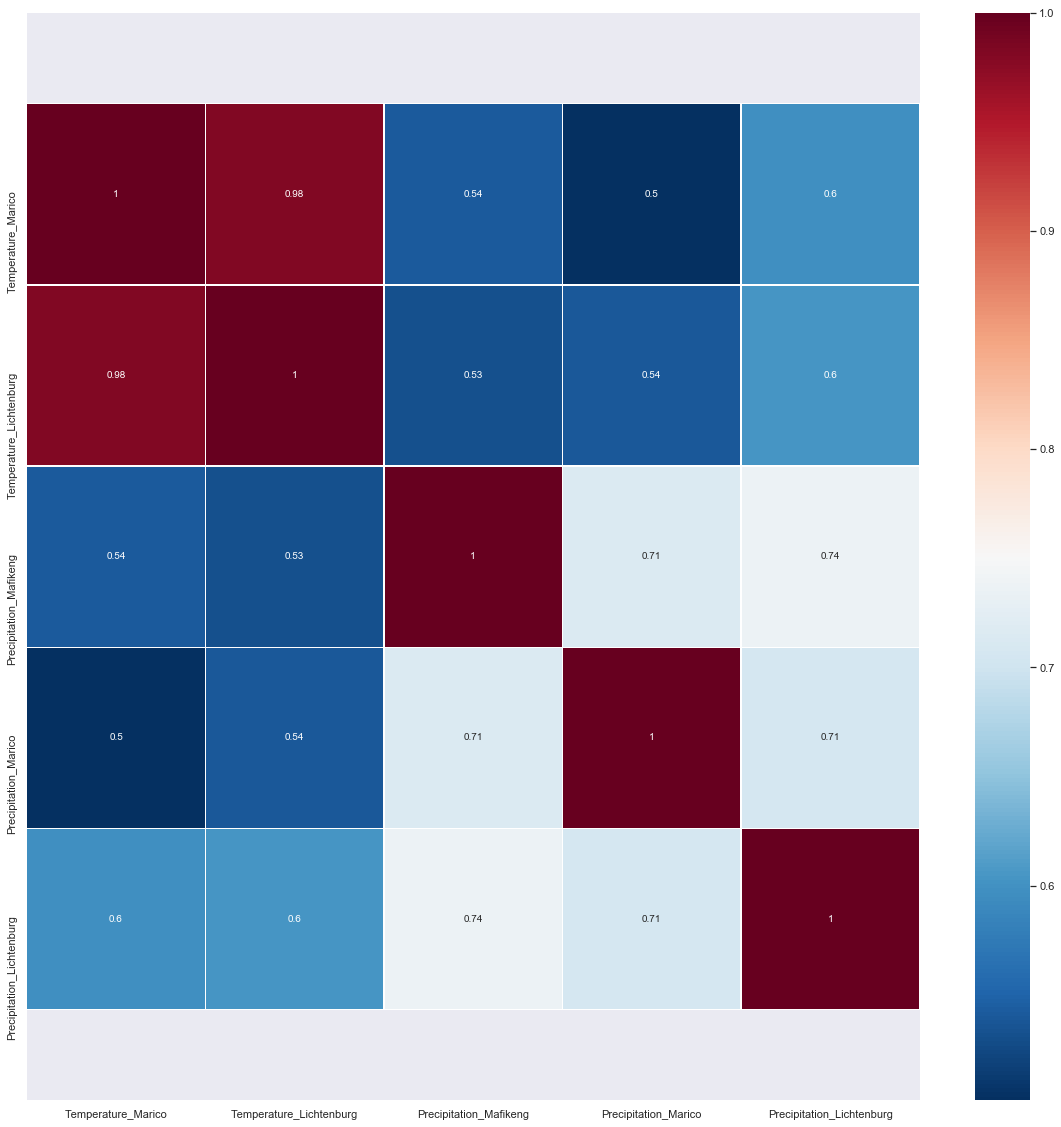

In [9]:
corrm1 =df.corr(method = 'spearman')
corrm2 = df.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm1.columns,
            yticklabels=corrm1.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [10]:
temperature = df.filter(['Temperature_Marico','Temperature_Lichtenburg'], axis=1)
precipitation = df.filter(['Precipitation_Marico','Precipitation_Mafikeng', 'Precipitation_Lichtenburg'], axis=1)

In [11]:
temperature['mean'] = temperature.mean(axis=1)
precipitation['mean'] = precipitation.mean(axis=1)

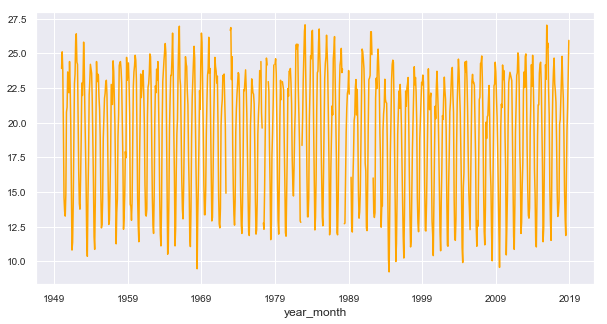

In [12]:
temperature["mean"].plot(figsize=(10,5),fontsize = 10, color="orange");

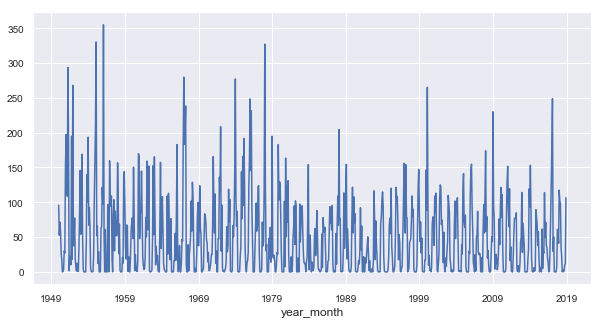

In [13]:
precipitation["mean"].plot(figsize=(10,5),fontsize = 10);

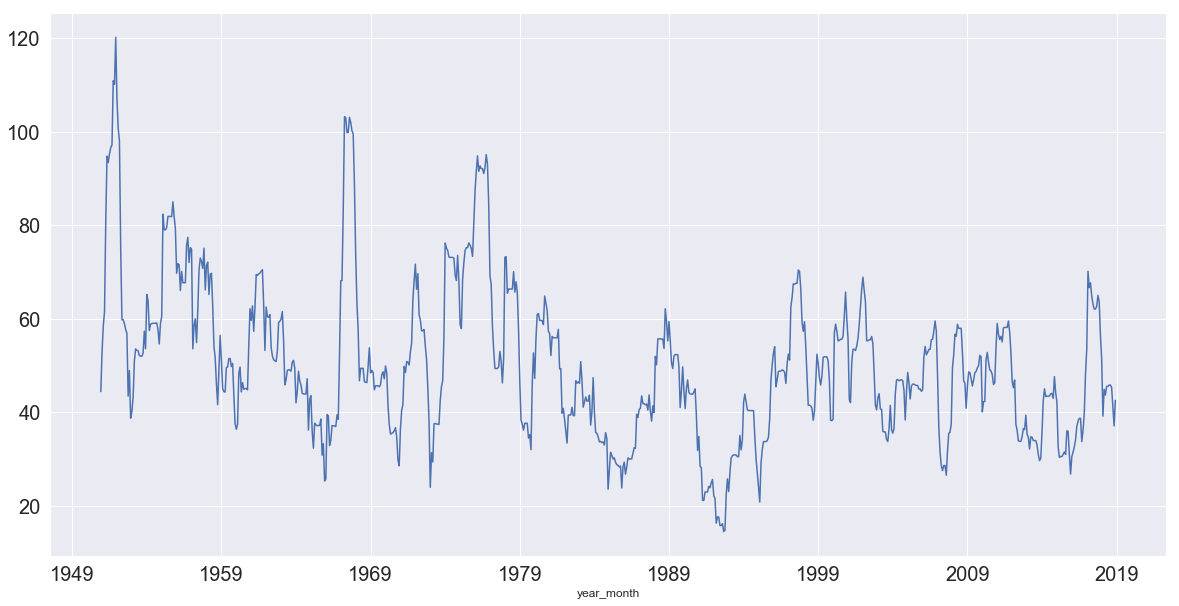

In [14]:
precipitation["mean"].rolling(12).mean().plot(figsize = (20,10),  fontsize=20)

In [15]:
precipitation["mean"].to_excel("C:/Users/Shylet/Downloads/Priority compartments/Grootfontein/weather/Precipitation.xlsx")
temperature["mean"].to_excel("C:/Users/Shylet/Downloads/Priority compartments/Grootfontein/weather/Temperature.xlsx")

In [16]:
precipitation.diff().corr()

,Precipitation_Marico,Precipitation_Mafikeng,Precipitation_Lichtenburg,mean
Precipitation_Marico,1.000000,0.492989,0.537483,0.937797
Precipitation_Mafikeng,0.492989,1.000000,0.606703,0.838072
Precipitation_Lichtenburg,0.537483,0.606703,1.000000,0.837357
mean,0.937797,0.838072,0.837357,1.000000


In [17]:
temperature.diff().corr()

,Temperature_Marico,Temperature_Lichtenburg,mean
Temperature_Marico,1.000000,0.957562,0.995293
Temperature_Lichtenburg,0.957562,1.000000,0.988909
mean,0.995293,0.988909,1.000000
